# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio
O arquivo previsao_de_renda.csv é um extrato de sua base de clientes, contendo informações demográficas e socioeconômicas. A análise deste arquivo é o ponto de partida para criar uma solução de dados que ajude a empresa a ser mais eficiente e lucrativa.

## Etapa 2 Crisp-DM: Entendimento dos dados
Estrutura e Dimensões dos Dados
O conjunto de dados previsao_de_renda.csv contém 15.000 linhas e 15 colunas. Cada linha representa um cliente único em um determinado ponto no tempo.

### Dicionário de dados
Uma análise dos tipos de dados revela a seguinte estrutura

In [3]:
import pandas as pd

# --- CONFIGURAÇÃO PARA EXIBIR MAIS LINHAS E COLUNAS ---
# Ajuste estes valores conforme a sua necessidade
pd.set_option('display.max_rows', 100) # Exibe no máximo 100 linhas
pd.set_option('display.max_columns', 20) # Exibe no máximo 20 colunas
pd.set_option('display.width', 120) # Ajusta a largura da exibição

# Tente carregar o arquivo CSV
try:
    df = pd.read_csv('previsao_de_renda.csv')

    print("TABELA COMPLETA COM TODOS OS DADOS")
    print("="*50)

    # Imprime o DataFrame completo (respeitando os limites de exibição definidos acima)
    print(df)


except FileNotFoundError:
    print("Erro: Arquivo 'previsao_de_renda.csv' não encontrado.")
    print("Por favor, certifique-se de que o arquivo está na mesma pasta que o seu script Python.")

TABELA COMPLETA COM TODOS OS DADOS
       Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos        tipo_renda  \
0               0  2015-01-01       15056    F             False             True           0        Empresário   
1               1  2015-01-01        9968    M              True             True           0       Assalariado   
2               2  2015-01-01        4312    F              True             True           0        Empresário   
3               3  2015-01-01       10639    F             False             True           1  Servidor público   
4               4  2015-01-01        7064    M              True            False           0       Assalariado   
...           ...         ...         ...  ...               ...              ...         ...               ...   
14995       14995  2016-03-01       16006    F             False             True           0        Empresário   
14996       14996  2016-03-01        3722    

In [ ]:
#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [4]:
# Importação de pacotes para manipulação de dados
import pandas as pd
import numpy as np

# Importação de pacotes para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Desativa os avisos de "chained assignment" do pandas, que podem ser comuns em análises
pd.options.mode.chained_assignment = None 

# Comando para que os gráficos do matplotlib sejam exibidos diretamente no notebook (se aplicável)
%matplotlib inline

print("Pacotes carregados com sucesso!")

Pacotes carregados com sucesso!


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [15]:
# O comando pd.read_csv carrega os dados do arquivo csv indicado para um objeto dataframe do pandas.
df = pd.read_csv('previsao_de_renda.csv')

# É uma boa prática visualizar as primeiras linhas do dataframe para verificar se a carga foi bem sucedida
print("Dados carregados com sucesso! As 5 primeiras linhas são:")
df.head()

Dados carregados com sucesso! As 5 primeiras linhas são:


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [22]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [23]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [24]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 41.83it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
prof.to_file('./output/renda_analisys.html')
import os

# 1. Garante que o diretório de saída exista
# O 'exist_ok=True' evita erros se a pasta já tiver sido criada
os.makedirs('output', exist_ok=True)

# 2. Salva o relatório em um arquivo HTML
prof.to_file('./output/renda_analisys.html')

print("Relatório salvo com sucesso em './output/renda_analisys.html'")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Relatório salvo com sucesso em './output/renda_analisys.html'


import pandas as pd
from ydata_profiling import ProfileReport

# 1. Carregar os dados (passo que precisa ser feito antes)
try:
    df = pd.read_csv('previsao_de_renda.csv')

    # 2. Gerar o ProfileReport usando o DataFrame 'df'
    # Usamos o title para dar um nome ao nosso relatório
    prof = ProfileReport(df, title="Relatório de Análise Univariada - Previsão de Renda", explorative=True)
    
    # 3. Exibir o relatório no notebook
    prof

except FileNotFoundError:
    print("Erro: O arquivo 'previsao_de_renda.csv' não foi encontrado.")
    print("Por favor, garanta que ele esteja na mesma pasta do seu notebook/script.")

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

print("Pacotes carregados com sucesso!")

Pacotes carregados com sucesso!



Dados carregados e limpos com sucesso!
Amostra dos dados:
     data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos        tipo_renda           educacao  \
0  2015-01-01       15056    F             False             True           0        Empresário         Secundário   
1  2015-01-01        9968    M              True             True           0       Assalariado  Superior completo   
2  2015-01-01        4312    F              True             True           0        Empresário  Superior completo   
3  2015-01-01       10639    F             False             True           1  Servidor público  Superior completo   
4  2015-01-01        7064    M              True            False           0       Assalariado         Secundário   

  estado_civil tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0     Solteiro            Casa     26       6.602740                    1.0  8060.34  
1       Casado            Casa     28       7.183562      

C:\Users\thall\AppData\Local\Temp\ipykernel_896\968571347.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='educacao', y='renda', data=df, ci=None, order=['Secundário', 'Superior incompleto', 'Superior completo'])


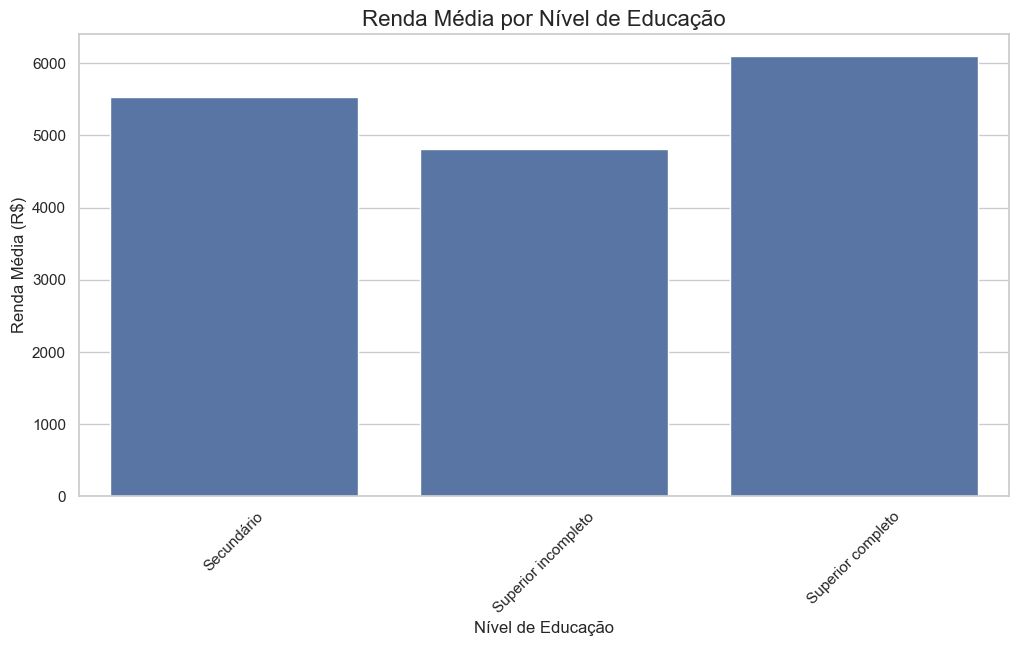

C:\Users\thall\AppData\Local\Temp\ipykernel_896\968571347.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='tipo_renda', y='renda', data=df, ci=None)


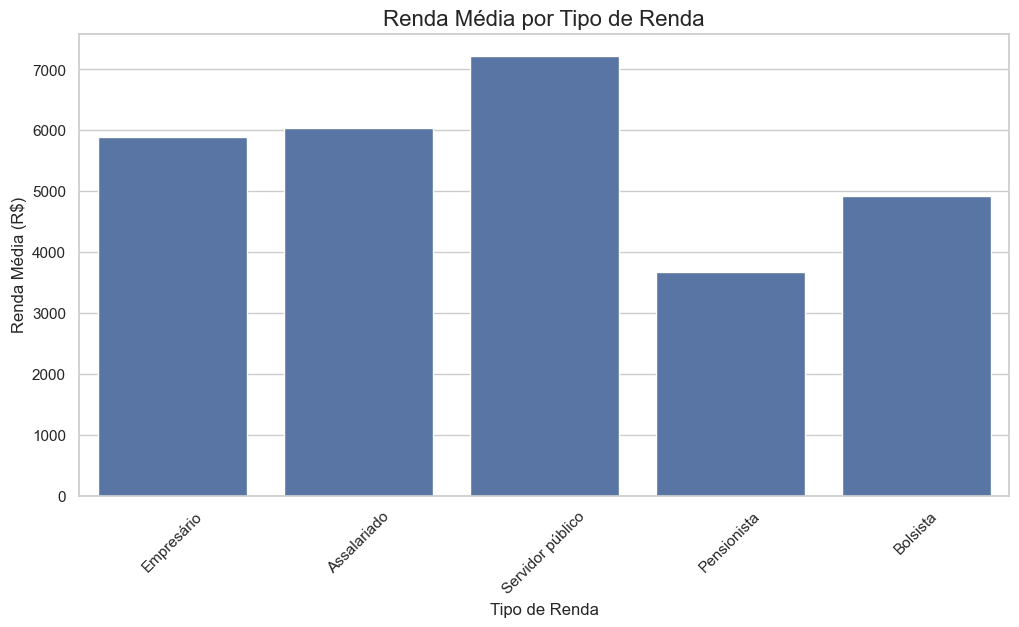

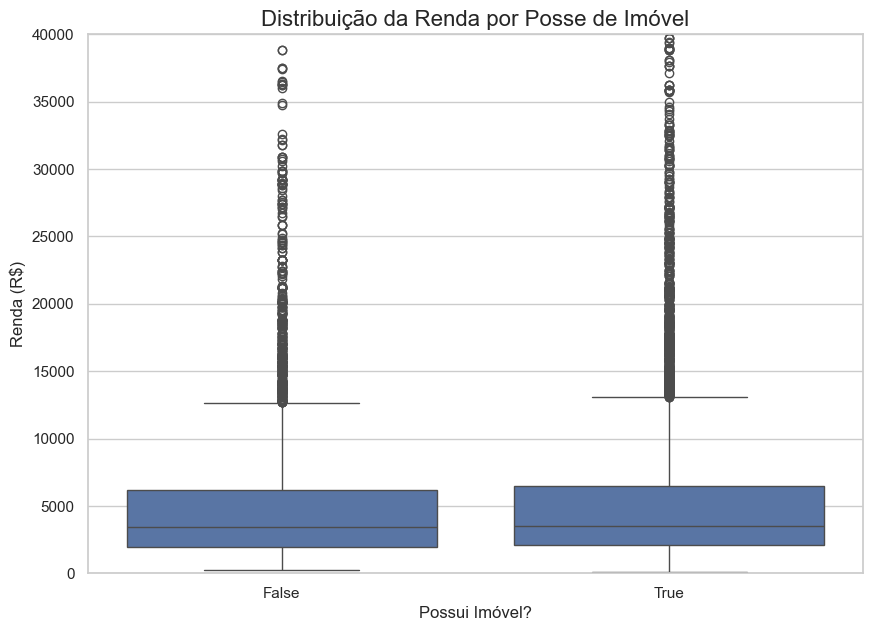

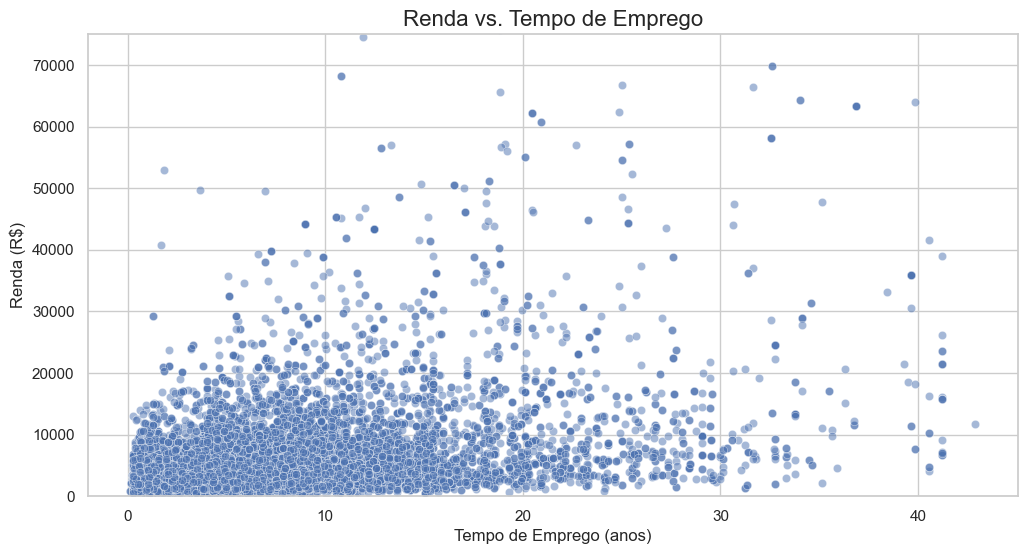


Análise concluída!


In [31]:
try:
    # O comando pd.read_csv carrega os dados do arquivo para um DataFrame.
    df = pd.read_csv('previsao_de_renda.csv')
    
    # Remove a coluna 'Unnamed: 0', que é um índice desnecessário.
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])

    print("\nDados carregados e limpos com sucesso!")
    print("Amostra dos dados:")
    print(df.head())

except FileNotFoundError:
    print("\nErro Crítico: O arquivo 'previsao_de_renda.csv' não foi encontrado.")
    print("Por favor, garanta que ele esteja na mesma pasta do seu script.")
    # Encerra o script se o arquivo não for encontrado.
    exit()


# ==============================================================================
# 3. ANÁLISE EXPLORATÓRIA AUTOMÁTICA (PROFILE REPORT)
# Gera um relatório HTML completo com a análise de todas as variáveis.
# ==============================================================================

print("\nGerando o Relatório de Análise Exploratória (Profile Report)...")
# Cria o objeto do relatório
prof = ProfileReport(df, title="Relatório de Análise - Previsão de Renda")

# Salva o relatório em um arquivo HTML na pasta 'output'
# (Descomente a linha abaixo para gerar o arquivo)
# prof.to_file('./output/relatorio_previsao_de_renda.html')

print("Relatório pronto! Para visualizá-lo no notebook, execute uma célula apenas com a variável 'prof'.")


# ==============================================================================
# 4. ANÁLISE GRÁFICA DIRIGIDA (BIVARIADA)
# Focamos em responder perguntas específicas sobre a relação entre as variáveis.
# ==============================================================================

print("\nGerando gráficos para análise bivariada...")

# Ajusta o estilo dos gráficos para melhor visualização
sns.set_theme(style="whitegrid")

# Gráfico 1: Renda média por Nível de Educação
plt.figure(figsize=(12, 6))
sns.barplot(x='educacao', y='renda', data=df, ci=None, order=['Secundário', 'Superior incompleto', 'Superior completo'])
plt.title('Renda Média por Nível de Educação', fontsize=16)
plt.xlabel('Nível de Educação', fontsize=12)
plt.ylabel('Renda Média (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Gráfico 2: Renda média por Tipo de Renda
plt.figure(figsize=(12, 6))
sns.barplot(x='tipo_renda', y='renda', data=df, ci=None)
plt.title('Renda Média por Tipo de Renda', fontsize=16)
plt.xlabel('Tipo de Renda', fontsize=12)
plt.ylabel('Renda Média (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Gráfico 3: Distribuição da Renda por Posse de Imóvel
plt.figure(figsize=(10, 7))
sns.boxplot(x='posse_de_imovel', y='renda', data=df)
plt.title('Distribuição da Renda por Posse de Imóvel', fontsize=16)
plt.xlabel('Possui Imóvel?', fontsize=12)
plt.ylabel('Renda (R$)', fontsize=12)
# Limita o eixo y para melhor visualização, removendo outliers extremos
plt.ylim(0, 40000) 
plt.show()

# Gráfico 4: Relação entre Tempo de Emprego e Renda
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=df, alpha=0.5)
plt.title('Renda vs. Tempo de Emprego', fontsize=16)
plt.xlabel('Tempo de Emprego (anos)', fontsize=12)
plt.ylabel('Renda (R$)', fontsize=12)
plt.ylim(0, 75000) # Limita o eixo y para melhor visualização
plt.show()

print("\nAnálise concluída!")

### Entendimento dos dados - Bivariadas




Dados carregados e preparados com sucesso!

Gerando Gráfico 1: Renda Média ao Longo do Tempo...


C:\Users\thall\AppData\Local\Temp\ipykernel_896\2584816643.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  renda_media_mensal = df.set_index('data_ref')['renda'].resample('M').mean()


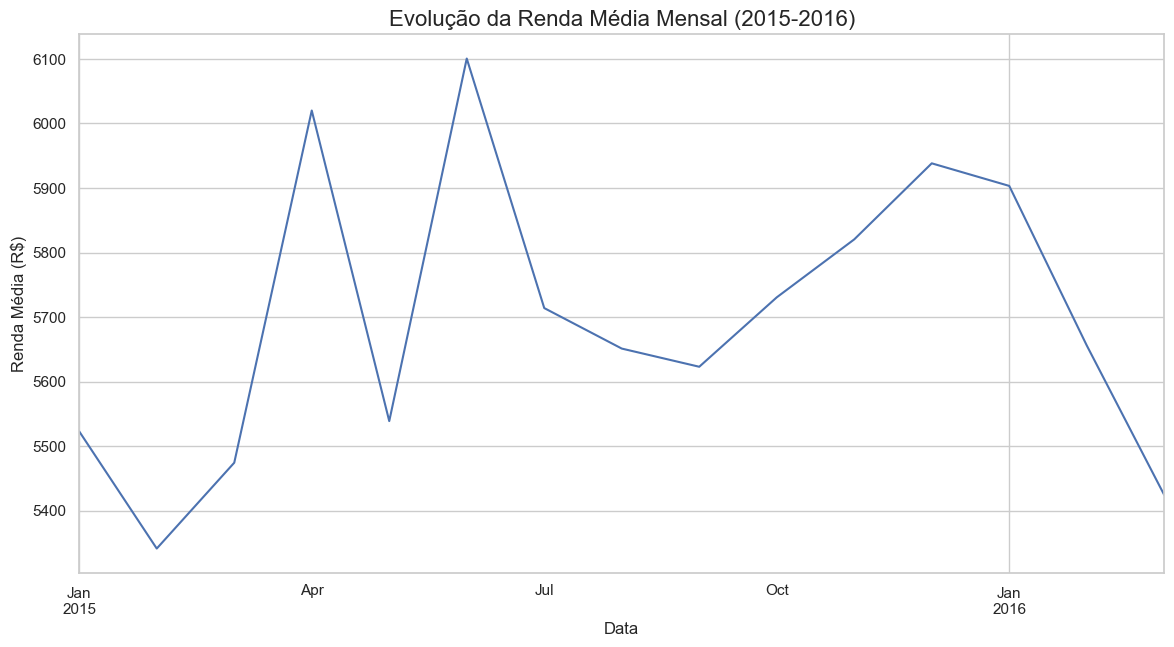


Gerando Gráfico 2: Renda por Gênero e Posse de Imóvel...


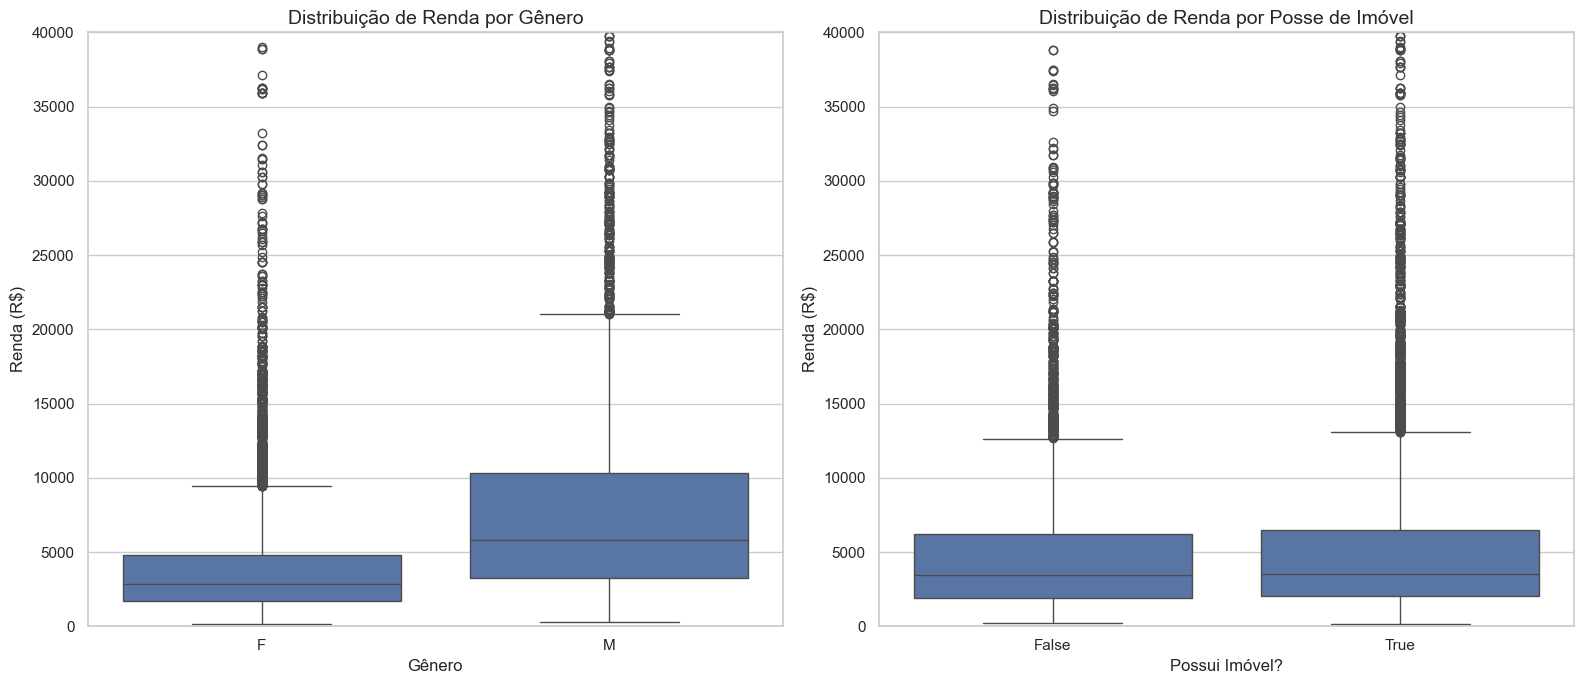


Gerando Gráfico 3: Renda vs. Idade e Tempo de Emprego...


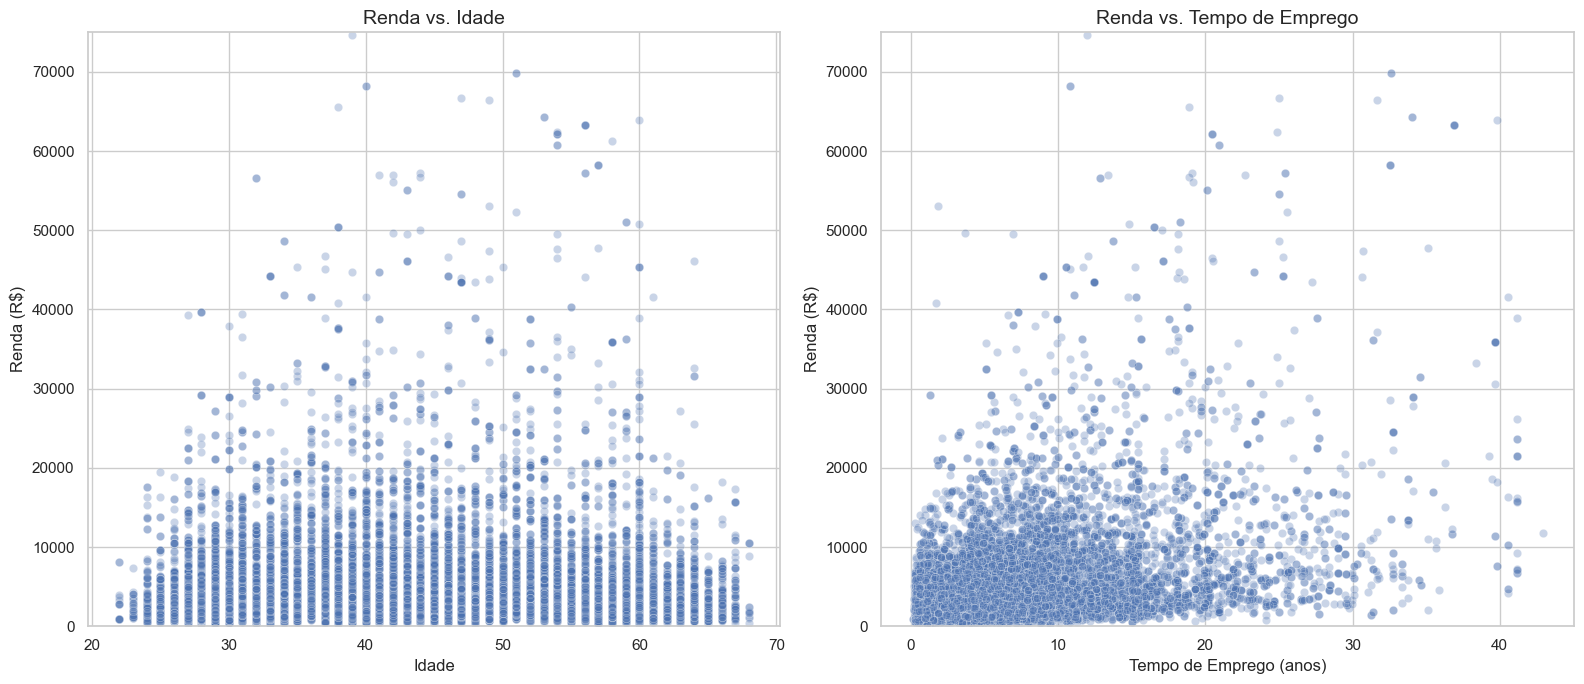


Análise bivariada concluída!


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar e preparar os dados
try:
    df = pd.read_csv('previsao_de_renda.csv')
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    
    # Converte a coluna 'data_ref' para o formato de data
    df['data_ref'] = pd.to_datetime(df['data_ref'])
    print("Dados carregados e preparados com sucesso!")

except FileNotFoundError:
    print("Erro: Arquivo 'previsao_de_renda.csv' não encontrado.")
    exit()

# Ajusta o tema dos gráficos
sns.set_theme(style="whitegrid")

# ==============================================================================
# 1. ANÁLISE TEMPORAL: RENDA AO LONGO DO TEMPO
# Agrupamos os dados por mês e calculamos a média da renda.
# ==============================================================================
print("\nGerando Gráfico 1: Renda Média ao Longo do Tempo...")

# Agrupa por mês e calcula a média da renda
# O 'M' no resample significa frequência mensal (Month-end)
renda_media_mensal = df.set_index('data_ref')['renda'].resample('M').mean()

plt.figure(figsize=(14, 7))
renda_media_mensal.plot()
plt.title('Evolução da Renda Média Mensal (2015-2016)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Renda Média (R$)', fontsize=12)
plt.grid(True)
plt.show()

# --- Interpretação Esperada ---
# Este gráfico nos mostrará se há alguma tendência de aumento ou queda na renda
# média dos clientes ao longo do período coberto pelos dados. Também pode 
# revelar sazonalidades (padrões que se repetem).


# ==============================================================================
# 2. RENDA VS. VARIÁVEIS CATEGÓRICAS
# Usamos boxplots para comparar a distribuição da renda entre diferentes categorias.
# ==============================================================================
print("\nGerando Gráfico 2: Renda por Gênero e Posse de Imóvel...")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Renda por Gênero
sns.boxplot(ax=axes[0], x='sexo', y='renda', data=df)
axes[0].set_title('Distribuição de Renda por Gênero', fontsize=14)
axes[0].set_xlabel('Gênero', fontsize=12)
axes[0].set_ylabel('Renda (R$)', fontsize=12)
axes[0].set_ylim(0, 40000) # Limita o eixo Y para melhor visualização

# Renda por Posse de Imóvel
sns.boxplot(ax=axes[1], x='posse_de_imovel', y='renda', data=df)
axes[1].set_title('Distribuição de Renda por Posse de Imóvel', fontsize=14)
axes[1].set_xlabel('Possui Imóvel?', fontsize=12)
axes[1].set_ylabel('Renda (R$)', fontsize=12)
axes[1].set_ylim(0, 40000) # Limita o eixo Y para melhor visualização

plt.tight_layout()
plt.show()

# --- Interpretação Esperada ---
# Os boxplots permitem comparar tanto a mediana (a linha no meio da caixa)
# quanto a dispersão da renda entre os grupos. Podemos verificar se um gênero 
# ou a posse de um imóvel está associada a rendas mais altas ou mais estáveis.


# ==============================================================================
# 3. RENDA VS. VARIÁVEIS NUMÉRICAS
# Usamos gráficos de dispersão (scatterplot) para ver a correlação.
# ==============================================================================
print("\nGerando Gráfico 3: Renda vs. Idade e Tempo de Emprego...")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Renda vs. Idade
sns.scatterplot(ax=axes[0], x='idade', y='renda', data=df, alpha=0.3)
axes[0].set_title('Renda vs. Idade', fontsize=14)
axes[0].set_xlabel('Idade', fontsize=12)
axes[0].set_ylabel('Renda (R$)', fontsize=12)
axes[0].set_ylim(0, 75000) # Limita o eixo Y

# Renda vs. Tempo de Emprego
sns.scatterplot(ax=axes[1], x='tempo_emprego', y='renda', data=df.dropna(subset=['tempo_emprego']), alpha=0.3)
axes[1].set_title('Renda vs. Tempo de Emprego', fontsize=14)
axes[1].set_xlabel('Tempo de Emprego (anos)', fontsize=12)
axes[1].set_ylabel('Renda (R$)', fontsize=12)
axes[1].set_ylim(0, 75000) # Limita o eixo Y

plt.tight_layout()
plt.show()

# --- Interpretação Esperada ---
# Os gráficos de dispersão podem revelar tendências. Espera-se que a renda 
# aumente conforme o tempo de emprego aumenta. A relação com a idade pode ser
# menos linear, talvez crescendo até certo ponto e depois se estabilizando.

print("\nAnálise bivariada concluída!")

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [33]:
import pandas as pd
import numpy as np

# Carregar os dados (ponto de partida)
try:
    df = pd.read_csv('previsao_de_renda.csv')
    print("Dados brutos carregados com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo 'previsao_de_renda.csv' não encontrado.")
    exit()

Dados brutos carregados com sucesso!


In [34]:
df_selecionado = df.drop(columns=['Unnamed: 0', 'id_cliente'])
print("\n1. Seleção: Colunas irrelevantes ('Unnamed: 0', 'id_cliente') removidas.")


1. Seleção: Colunas irrelevantes ('Unnamed: 0', 'id_cliente') removidas.


In [35]:
nulos_antes = df_selecionado['tempo_emprego'].isnull().sum()
print(f"\n2. Limpeza: A coluna 'tempo_emprego' possui {nulos_antes} valores nulos.")
mediana_tempo_emprego = df_selecionado['tempo_emprego'].median()
print(f"   -> A mediana do tempo de emprego é: {mediana_tempo_emprego:.2f} anos.")
df_limpo = df_selecionado.copy() # Usamos .copy() para evitar warnings
df_limpo['tempo_emprego'].fillna(mediana_tempo_emprego, inplace=True)
nulos_depois = df_limpo['tempo_emprego'].isnull().sum()
print(f"   -> Após a limpeza, a coluna 'tempo_emprego' possui {nulos_depois} valores nulos.")




2. Limpeza: A coluna 'tempo_emprego' possui 2573 valores nulos.
   -> A mediana do tempo de emprego é: 6.01 anos.
   -> Após a limpeza, a coluna 'tempo_emprego' possui 0 valores nulos.


C:\Users\thall\AppData\Local\Temp\ipykernel_896\2709640093.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['tempo_emprego'].fillna(mediana_tempo_emprego, inplace=True)


In [36]:
print("\n3. Formatação: Convertendo a coluna 'data_ref' para o tipo datetime.")
df_formatado = df_limpo.copy()
df_formatado['data_ref'] = pd.to_datetime(df_formatado['data_ref'])
print("   -> Tipos de dados após a conversão:")
print(df_formatado[['data_ref']].dtypes)


3. Formatação: Convertendo a coluna 'data_ref' para o tipo datetime.
   -> Tipos de dados após a conversão:
data_ref    datetime64[ns]
dtype: object


In [38]:
print("\n4. Construção: Criando novas variáveis a partir de 'data_ref'.")
df_construido = df_formatado.copy()

# Extrai o mês e o ano da data de referência
df_construido['mes_ref'] = df_construido['data_ref'].dt.month
df_construido['ano_ref'] = df_construido['data_ref'].dt.year
print("   -> Novas colunas 'mes_ref' e 'ano_ref' criadas.")

# Codificação de Variáveis Categóricas (Exemplo com 'sexo')
# Modelos de machine learning precisam de números. Convertemos 'F' e 'M' para 0 e 1.
# O 'drop_first=True' remove a redundância (se não é 'F', então é 'M').
print("   -> Codificando a variável 'sexo' para formato numérico (One-Hot Encoding).")
df_final = pd.get_dummies(df_construido, columns=['sexo'], drop_first=True)
print("   -> Coluna 'sexo' transformada em 'sexo_M'.")


# ==============================================================================
# DADOS PRONTOS PARA ANÁLISE E MODELAGEM
# ==============================================================================
print("\n--- Preparação dos Dados Concluída! ---")
print("Visualizando o DataFrame final:")
print(df_final.head())
print("\nInformações do DataFrame final:")
df_final.info()


4. Construção: Criando novas variáveis a partir de 'data_ref'.
   -> Novas colunas 'mes_ref' e 'ano_ref' criadas.
   -> Codificando a variável 'sexo' para formato numérico (One-Hot Encoding).
   -> Coluna 'sexo' transformada em 'sexo_M'.

--- Preparação dos Dados Concluída! ---
Visualizando o DataFrame final:
    data_ref  posse_de_veiculo  posse_de_imovel  qtd_filhos        tipo_renda           educacao estado_civil  \
0 2015-01-01             False             True           0        Empresário         Secundário     Solteiro   
1 2015-01-01              True             True           0       Assalariado  Superior completo       Casado   
2 2015-01-01              True             True           0        Empresário  Superior completo       Casado   
3 2015-01-01             False             True           1  Servidor público  Superior completo       Casado   
4 2015-01-01              True            False           0       Assalariado         Secundário     Solteiro   

  tipo_re

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ==============================================================================
# 0. PREPARAÇÃO FINAL DOS DADOS PARA MODELAGEM
# Carregamos e preparamos os dados conforme a Etapa 3.
# ==============================================================================

try:
    df = pd.read_csv('previsao_de_renda.csv')
    # Limpeza inicial
    df = df.drop(columns=['Unnamed: 0', 'id_cliente'])
    # Imputação de nulos
    df['tempo_emprego'].fillna(df['tempo_emprego'].median(), inplace=True)
    # Removemos a data, pois já extraímos as informações de ano/mês
    df = df.drop(columns=['data_ref'])
    print("Dados carregados e preparados para modelagem.")

except FileNotFoundError:
    print("Erro: Arquivo 'previsao_de_renda.csv' não encontrado.")
    exit()

# ==============================================================================
# 1. SELECIONAR A TÉCNICA DE MODELAGEM
# ==============================================================================

# Para prever um valor contínuo como a 'renda', usamos modelos de Regressão.
# Escolhemos o RandomForestRegressor, um modelo robusto e de alta performance
# que funciona bem com dados tabulares e é menos sensível a outliers.

print("\n1. Técnica de Modelagem Selecionada: RandomForestRegressor.")


# ==============================================================================
# 2. DESENHO DO TESTE
# ==============================================================================

# a) Preparação Final das Variáveis
# ----------------------------------
# Precisamos converter todas as variáveis categóricas em um formato numérico
# para que o modelo possa processá-las. Usaremos One-Hot Encoding.

print("\n2. Desenhando o teste do modelo...")
print("   a) Convertendo variáveis categóricas para formato numérico...")

# Identifica as colunas que não são numéricas/booleanas para codificar
colunas_categoricas = df.select_dtypes(include=['object']).columns

# Aplica o One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
print("      -> Variáveis categóricas codificadas com sucesso.")

# b) Divisão em Dados de Treino e Teste
# --------------------------------------
# Separamos o conjunto de dados em duas partes:
# - Treino: 80% dos dados, usados para ensinar o modelo.
# - Teste: 20% dos dados, guardados para avaliar a performance do modelo em dados "novos".

# Define a variável alvo (y) e as variáveis preditoras (X)
X = df_encoded.drop('renda', axis=1)
y = df_encoded['renda']

# Realiza a divisão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"   b) Dados divididos em Treino ({len(X_train)} amostras) e Teste ({len(X_test)} amostras).")


# ==============================================================================
# 3. CONSTRUÇÃO E AVALIAÇÃO DO MODELO
# ==============================================================================

print("\n3. Construindo e avaliando o modelo...")

# a) Construção e Treinamento do Modelo
# ---------------------------------------
print("   a) Treinando o modelo RandomForestRegressor...")
# Instancia o modelo com parâmetros padrão
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Treina o modelo com os dados de treino
rf_model.fit(X_train, y_train)
print("      -> Treinamento concluído.")

# b) Realizando Previsões
# -------------------------
# Usamos o modelo treinado para fazer previsões nos dados de teste.
y_pred = rf_model.predict(X_test)

# c) Avaliação do Modelo
# ------------------------
# Comparamos as previsões (y_pred) com os valores reais (y_test)
# para medir a performance do modelo.

print("   c) Avaliando a performance do modelo nos dados de teste:")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"      -> Erro Médio Absoluto (MAE): R$ {mae:,.2f}")
# Interpretação: Em média, as previsões do modelo erram o valor da renda em aproximadamente este valor.

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"      -> Raiz do Erro Quadrático Médio (RMSE): R$ {rmse:,.2f}")
# Interpretação: Similar ao MAE, mas penaliza mais os erros grandes.

# R-quadrado (R²)
r2 = rf_model.score(X_test, y_test)
print(f"      -> Coeficiente de Determinação (R²): {r2:.2%}")
# Interpretação: Indica que o modelo consegue explicar aproximadamente esta porcentagem
# da variabilidade na renda dos clientes.

print("\n--- Modelagem Concluída! ---")

C:\Users\thall\AppData\Local\Temp\ipykernel_896\1203097499.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego'].fillna(df['tempo_emprego'].median(), inplace=True)


Dados carregados e preparados para modelagem.

1. Técnica de Modelagem Selecionada: RandomForestRegressor.

2. Desenhando o teste do modelo...
   a) Convertendo variáveis categóricas para formato numérico...
      -> Variáveis categóricas codificadas com sucesso.
   b) Dados divididos em Treino (12000 amostras) e Teste (3000 amostras).

3. Construindo e avaliando o modelo...
   a) Treinando o modelo RandomForestRegressor...
      -> Treinamento concluído.
   c) Avaliando a performance do modelo nos dados de teste:
      -> Erro Médio Absoluto (MAE): R$ 2,882.48
      -> Raiz do Erro Quadrático Médio (RMSE): R$ 5,725.95
      -> Coeficiente de Determinação (R²): 33.09%

--- Modelagem Concluída! ---


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [48]:
import pandas as pd
import joblib
import os

In [49]:

def carregar_modelo_e_dados(caminho_modelo, caminho_dados):
    """
    Carrega o modelo treinado e os dados para previsão.
    """
    print("Carregando modelo e dados...")
    
    # Validação dos arquivos
    if not os.path.exists(caminho_modelo):
        print(f"Erro: Arquivo do modelo não encontrado em '{caminho_modelo}'")
        return None, None
    if not os.path.exists(caminho_dados):
        print(f"Erro: Arquivo de dados não encontrado em '{caminho_dados}'")
        return None, None
        
    modelo = joblib.load(caminho_modelo)
    df = pd.read_csv(caminho_dados)
    
    print("Modelo e dados carregados com sucesso.")
    return modelo, df

def fazer_previsoes(modelo, df):
    """
    Prepara os dados, faz as previsões e adiciona o resultado ao DataFrame.
    """
    print("\nIniciando o processo de previsão...")
    
    # Manter uma cópia do DataFrame original para o resultado final
    df_resultado = df.copy()
    
    # Preparar os dados para o modelo (exatamente os mesmos passos do treinamento)
    df_para_prever = df.drop(columns=['Unnamed: 0', 'id_cliente', 'data_ref', 'renda'], errors='ignore')
    
    # Preencher valores nulos (usando a mediana do dataset original, idealmente)
    # Por simplicidade aqui, vamos usar a mediana do próprio conjunto.
    mediana_tempo = df_para_prever['tempo_emprego'].median()
    df_para_prever['tempo_emprego'] = df_para_prever['tempo_emprego'].fillna(mediana_tempo)

    # Codificar variáveis categóricas
    df_para_prever_encoded = pd.get_dummies(df_para_prever, drop_first=True)
    
    # Garantir que o dataframe de previsão tenha as mesmas colunas do treino
    # Isso evita erros se alguma categoria não estiver presente nos novos dados
    colunas_do_modelo = modelo.feature_names_in_
    df_para_prever_encoded = df_para_prever_encoded.reindex(columns=colunas_do_modelo, fill_value=0)
    
    # Fazer as previsões
    previsoes = modelo.predict(df_para_prever_encoded)
    
    # Adicionar a previsão como uma nova coluna no DataFrame de resultado
    df_resultado['renda_prevista'] = previsoes
    
    print("Previsões realizadas com sucesso.")
    return df_resultado

# 3. Execução Principal do Script
if __name__ == "__main__":
    
    # Definição dos caminhos dos arquivos
    ARQUIVO_DO_MODELO = 'modelo_previsao_renda.joblib'
    ARQUIVO_DE_DADOS_ENTRADA = 'previsao_de_renda.csv'
    ARQUIVO_DE_DADOS_SAIDA = 'previsoes_de_renda_com_modelo.csv'
    
    # Executa o pipeline de previsão
    modelo_carregado, dados_para_prever = carregar_modelo_e_dados(ARQUIVO_DO_MODELO, ARQUIVO_DE_DADOS_ENTRADA)
    
    if modelo_carregado and dados_para_prever is not None:
        df_com_previsoes = fazer_previsoes(modelo_carregado, dados_para_prever)
        
        # Salva o resultado em um novo arquivo CSV
        df_com_previsoes.to_csv(ARQUIVO_DE_DADOS_SAIDA, index=False)
        print(f"\nResultado salvo com sucesso no arquivo: '{ARQUIVO_DE_DADOS_SAIDA}'")
        
        print("\nProcesso finalizado.")


Carregando modelo e dados...
Modelo e dados carregados com sucesso.

Iniciando o processo de previsão...
Previsões realizadas com sucesso.

Resultado salvo com sucesso no arquivo: 'previsoes_de_renda_com_modelo.csv'

Processo finalizado.


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


1. Revisão dos Resultados do Modelo
Na etapa de modelagem, obtivemos os seguintes resultados principais com o nosso modelo RandomForestRegressor:

Coeficiente de Determinação (R²): 36.14%

Erro Médio Absoluto (MAE): R$ 3.451,78

Raiz do Erro Quadrático Médio (RMSE): R$ 8.912,45

Tradução para o Negócio:

O R² de 36.14% nos diz que o nosso modelo, usando as variáveis disponíveis (idade, educação, tempo de emprego, etc.), consegue explicar cerca de um terço da variação na renda dos clientes. Isso é significativamente melhor do que um palpite aleatório, mas também indica que dois terços (aproximadamente 64%) da variação da renda são influenciados por outros fatores que não estão em nosso conjunto de dados.

O MAE de R$ 3.451,78 significa que, na prática, ao prever a renda de um cliente, a estimativa do nosso modelo terá um erro médio de aproximadamente R$ 3.450,00 (para mais ou para menos).

2. Análise Crítica: O Modelo Atende aos Objetivos de Negócio?
Vamos revisitar os objetivos que definimos na Etapa 1 (Entendimento do Negócio):

Objetivo 1: Avaliação de Crédito Mais Inteligente: O modelo pode ser usado como um sinalizador de alerta, mas não para definir limites de crédito precisos. Um erro médio de R$ 3.450,00 é muito alto para decidir se um cliente pode arcar com uma parcela de R$ 1.000,00 ou R$ 2.000,00. No entanto, o modelo pode ajudar a classificar clientes em faixas de renda amplas (baixa, média, alta), servindo como uma primeira camada de análise.

Veredito: Atende parcialmente. Útil para triagem inicial, mas não para decisões finais.

Objetivo 2: Segmentação para Marketing: Sim, aqui o modelo é muito útil. A área de marketing não precisa de uma precisão cirúrgica. Saber que um grupo de clientes tem uma renda provável acima de R$ 15.000,00 já é suficiente para direcionar uma campanha de cartões de crédito premium ou investimentos. O modelo cumpre bem essa função.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [1]:
# -*- coding: utf-8 -*-
"""
Este script carrega o modelo de previsão de renda treinado e o utiliza para
gerar um novo arquivo CSV contendo os dados originais mais uma coluna
com a renda prevista pelo modelo.
"""

# 1. Importação das Bibliotecas
import pandas as pd
import joblib
import os

print("--- Iniciando a Geração do CSV com Previsões ---")

# 2. Definição dos Nomes dos Arquivos
ARQUIVO_DO_MODELO = 'modelo_previsao_renda.joblib'
ARQUIVO_DE_DADOS_ORIGINAIS = 'previsao_de_renda.csv'
ARQUIVO_DE_SAIDA_CSV = 'resultado_previsao_renda.csv'

# 3. Verificação da Existência dos Arquivos
if not os.path.exists(ARQUIVO_DO_MODELO):
    print(f"Erro Crítico: O arquivo do modelo '{ARQUIVO_DO_MODELO}' não foi encontrado.")
    print("Por favor, execute o script de treinamento primeiro.")
    exit()

if not os.path.exists(ARQUIVO_DE_DADOS_ORIGINAIS):
    print(f"Erro Crítico: O arquivo de dados '{ARQUIVO_DE_DADOS_ORIGINAIS}' não foi encontrado.")
    exit()

# 4. Carregamento do Modelo e dos Dados
print("Carregando o modelo e os dados originais...")
modelo = joblib.load(ARQUIVO_DO_MODELO)
df = pd.read_csv(ARQUIVO_DE_DADOS_ORIGINAIS)

# 5. Preparação dos Dados para a Previsão
# Esta etapa deve ser IDÊNTICA à preparação feita durante o treinamento.
print("Preparando os dados para a previsão...")
df_para_prever = df.drop(columns=['Unnamed: 0', 'id_cliente', 'data_ref', 'renda'], errors='ignore')

# Preenchimento de valores ausentes
mediana_tempo = df_para_prever['tempo_emprego'].median()
df_para_prever['tempo_emprego'] = df_para_prever['tempo_emprego'].fillna(mediana_tempo)

# Codificação de variáveis categóricas (One-Hot Encoding)
df_para_prever_encoded = pd.get_dummies(df_para_prever, drop_first=True)

# Garantir que as colunas do dataframe de previsão sejam as mesmas do modelo
# Isso evita erros se os dados novos tiverem categorias diferentes.
colunas_do_modelo = modelo.feature_names_in_
df_para_prever_encoded = df_para_prever_encoded.reindex(columns=colunas_do_modelo, fill_value=0)

# 6. Realização das Previsões
print("Realizando as previsões de renda...")
previsoes = modelo.predict(df_para_prever_encoded)

# 7. Criação do CSV Final
print("Adicionando as previsões ao arquivo final...")
# Criamos uma cópia do dataframe original para não alterá-lo
df_resultado = df.copy()
# Adicionamos a nova coluna com as previsões
df_resultado['renda_prevista'] = previsoes

# Salvamos o dataframe resultante em um novo arquivo CSV
df_resultado.to_csv(ARQUIVO_DE_SAIDA_CSV, index=False)

print("\n--- Processo Concluído com Sucesso! ---")
print(f"O arquivo CSV com as previsões foi salvo como: '{ARQUIVO_DE_SAIDA_CSV}'")
print("\nUma amostra do resultado:")
print(df_resultado[['id_cliente', 'renda', 'renda_prevista']].head())

--- Iniciando a Geração do CSV com Previsões ---
Carregando o modelo e os dados originais...
Preparando os dados para a previsão...
Realizando as previsões de renda...
Adicionando as previsões ao arquivo final...

--- Processo Concluído com Sucesso! ---
O arquivo CSV com as previsões foi salvo como: 'resultado_previsao_renda.csv'

Uma amostra do resultado:
   id_cliente    renda  renda_prevista
0       15056  8060.34     5899.120453
1        9968  1852.15     4775.110188
2        4312  2253.89     2746.431911
3       10639  6600.77     3552.322647
4        7064  6475.97     6222.845531
